# Jinghao Yan
# ANLY590
# HW2

## Exercise 1 Autoencoder

Build and fit a convolutional autoencoder for the Fashion MNIST dataset. After training your network, visualize some examples of input images and their decoded reconstruction.

In [190]:
# Import packages

import os
from keras.applications import VGG16
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.layers import Embedding, SimpleRNN, LSTM, GRU
from keras.models import Model, Sequential
from keras.preprocessing.image import img_to_array, array_to_img
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
%matplotlib inline
plt.viridis()

<Figure size 432x288 with 0 Axes>

(60000, 28, 28)


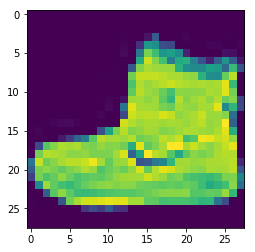

In [181]:
# Code taken from Dr. Hines' lectures and https://blog.keras.io/building-autoencoders-in-keras.html

# Load Fashion MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Shape check and plotting
print(X_train.shape)
plt.imshow(X_train[0])

In [182]:
# Declaring a depth of 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up values as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [183]:
# Processing class labels they are currently a numeric vector
# Transform them into categories
print(y_train.shape)
print(y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [184]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(Y_train.shape)

(60000, 10)


In [186]:
input_img = Input(shape=(28, 28, 1))

# set up encoder part of network
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

# set up decoder part of network
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [187]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 16)          0         
__________

In [188]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3585 - val_loss: 0.3269
Epoch 2/20
60000/60000 [==============================] - 92s 2ms/step - loss: 0.3136 - val_loss: 0.3061
Epoch 3/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3029 - val_loss: 0.3008
Epoch 4/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2974 - val_loss: 0.2975
Epoch 5/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2940 - val_loss: 0.2922
Epoch 6/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2915 - val_loss: 0.2934
Epoch 7/20
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2893 - val_loss: 0.2892
Epoch 8/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2878 - val_loss: 0.2870
Epoch 9/20
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2865 - val_loss: 0.2871
Epoch

<Figure size 432x288 with 0 Axes>

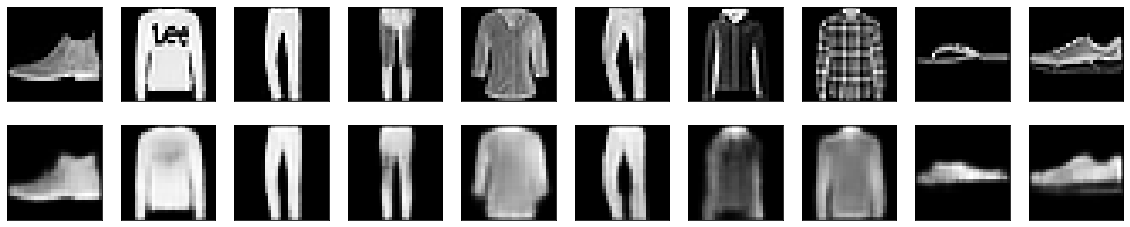

In [191]:
plt.clf()
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

It appears that the convolutional autoencoder does a decent job of reconstructing the original images, as the decoded reconstructions of the images seem fairly representational of their originals. However, the details, such as fine text, etc, are not as visible in the reconstructed images, which is expected.

## Exercise 2 Image Classification
### Problem 2.1

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you've made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model's performance on training set and test set.

In [193]:
# Using the same Fashion MNIST dataset

# CNN input layer
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
#print(model.output_shape)

# Add remaining layers
model.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Setting up the fully connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                589888    
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
__________

Here, this model consists of 2 convolutional layers. First layer has 32 filters, 3 by 3 kernel size, 1 by 1 stride, no padding, and ReLu activation. Second layer has 64 filters, 3 by 3 kernel size, 1 by 1 stride, no padding, and ReLu activation. After this, there is a 2 by 2 block maxpooling, dropout at rate 0.25, a layer of flattening into vector, and a dense layer of ReLu activation with 64 hidden nodes. Finally, another dropout at rate 0.5 is done and we have an output layer of 10 nodes with Softmax activation.

In [194]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [195]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [196]:
model_training = model.fit(X_train, Y_train,
          epochs=15,
          batch_size=256,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.6955 - acc: 0.7620 - val_loss: 0.3877 - val_acc: 0.8606
Epoch 2/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.4411 - acc: 0.8451 - val_loss: 0.3314 - val_acc: 0.8815
Epoch 3/15
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3798 - acc: 0.8645 - val_loss: 0.3044 - val_acc: 0.8915
Epoch 4/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3508 - acc: 0.8769 - val_loss: 0.2869 - val_acc: 0.8963
Epoch 5/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3216 - acc: 0.8850 - val_loss: 0.2677 - val_acc: 0.9014
Epoch 6/15
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3029 - acc: 0.8909 - val_loss: 0.2746 - val_acc: 0.8990
Epoch 7/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2855 - acc: 0.8981 - val_loss: 0.2537 - val_acc

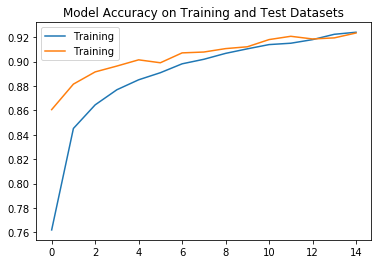

In [198]:
plt.plot(model_training.history["acc"], label="Training")
plt.plot(model_training.history["val_acc"], label="Training")
plt.legend()
plt.title("Model Accuracy on Training and Test Datasets")
plt.show()

Something interesting is noticeable here - the model accuracy for the training set greatly improves, with the end result of just under 0.92, but the model accuracy for the test set only improves slightly, with the end result also around 0.92.

### Problem 2.2

Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model's performance on training set and test set.

In [199]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))

In [200]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [201]:
# Resize data
vggX_train = np.c_[X_train,X_train,X_train]
vggX_test = np.c_[X_test,X_test,X_test]

In [202]:
vggX_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in vggX_train])
vggX_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in vggX_test])

In [203]:
model2 = Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256, activation="relu"))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation="softmax"))

Here, we have the VGG16 as the pre-trained network, followed by a layer of flattening into vector, then a dense layer of ReLu activation with 256 hidden nodes. After that, we perform a dropout at rate 0.25 and finally, the output layer of 10 nodes with softmax activation.

In [204]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [205]:
model2.trainable_weights

[<tf.Variable 'block1_conv1_1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2_1/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1_1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2_1/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1_1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2_1/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3_1/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 

In [206]:
conv_base.trainable = False

In [208]:
model2.trainable_weights

[<tf.Variable 'dense_29/kernel:0' shape=(512, 256) dtype=float32_ref>,
 <tf.Variable 'dense_29/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_30/kernel:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'dense_30/bias:0' shape=(10,) dtype=float32_ref>]

In [209]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [210]:
model_vgg = model2.fit(vggX_train, Y_train,
          epochs=10,
          batch_size=256,
          validation_data=(vggX_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 7424/60000 [==>...........................] - ETA: 6:35 - loss: 2.3198 - acc: 0.1363

KeyboardInterrupt: 

## Exercise 3 Text Classification
### Problem 3.1

Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [171]:
# Read in data
malurl = []
with open('malicious-urls.txt') as fmalurl:
    for line in fmalurl:
        malurl.append(line.strip())
benurl = []
with open('benign-urls.txt') as fbenurl:
    for line in fbenurl:
        if line.startswith('#') == False:
            benurl.append(line.strip())

In [ ]:
# Combine
totalurl = malurl+benurl

In [ ]:
# Label URLs
labels = [0]*len(benurl)+[1]*len(malurl)

In [ ]:
chars = sorted(list(set(''.join(totalurl))))
print('total chars:', len(chars))

In [ ]:
# Create mapping between characters and their numeric index
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# Max len
maxlen = max(len(i) for i in totalurl)

# Create one-hot vectors
X = np.zeros((len(totalurl), maxlen, len(chars)), dtype=np.uint8)
for i, seq in enumerate(totalurl):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1

In [ ]:
# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.3, random_state=100)

In [ ]:
# LSTM RNN
char_rnn = Sequential()
char_rnn.add(LSTM(128, input_shape=(maxlen, len(chars))), return_sequences=True)
char_rnn.add(Dropout(0.25))
char_rnn.add(Dense(64, activation="relu"))
char_rnn.add(Dense(1, activation="sigmoid"))
char_rnn.summary()

In [ ]:
# Compile
char_rnn.compile(loss='categorical_crossentropy',
                 optimizer=RMSprop,
                 metrics=['accuracy'])

In [ ]:
# Fit
char_rnn.fit(X_train,Y_train,
             epochs=10,
             batch_size=512,
             validation_data=(X_test,Y_test))

### Problem 3.2

Build and train a 1D CNN for this text classification task.

In [127]:
# CNN input layer
char_cnn = Sequential()
char_cnn.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))

# Add remaining layers
char_cnn.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
char_cnn.add(MaxPooling2D(pool_size=(2,2)))
char_cnn.add(Dropout(0.25))

# Setting up the fully connected layer
char_cnn.add(Flatten())
char_cnn.add(Dense(64, activation='relu'))
char_cnn.add(Dropout(0.5))
char_cnn.add(Dense(10, activation='softmax'))
print(char_cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                589888    
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
__________

In [128]:
char_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [130]:
char_cnn = model.fit(X_train, Y_train,
          epochs=20,
          batch_size=256,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.7114 - acc: 0.7473 - val_loss: 0.4098 - val_acc: 0.8570
Epoch 2/5
60000/60000 [==============================] - 73s 1ms/step - loss: 0.4464 - acc: 0.8431 - val_loss: 0.3314 - val_acc: 0.8835
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.3850 - acc: 0.8633 - val_loss: 0.3093 - val_acc: 0.8898
Epoch 4/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3522 - acc: 0.8738 - val_loss: 0.2884 - val_acc: 0.8972
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.3292 - acc: 0.8818 - val_loss: 0.2750 - val_acc: 0.9011


### Problem 3.3

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don't forget to create a train-test split.